# **ID Card OCR using PyTesseract**

# Problem

* Extract information from the image of a permanent account number card by OCR in proper format.
* Information includes Name, Father's Name, Date of Birth, PAN

# Solution

# Initialisation

# Import

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import cv2
import re
from scipy.ndimage import rotate

# **Regex to detect necessary text**

In [2]:
r = re.compile("([A-Z]{5}[0-9]{4}[A-Z]{1})|([0-9]{2}/[0-9]{2}/[0-9]{4})|([A-Z]{6}\d[A-Z]{4})")

# **Display image**

Matplotlib interprets images in RGB format, but OpenCV uses BGR format

In [3]:
def disp_img(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

margin = 10
# x_margin, y_margin = 10, 10

# **Read image**

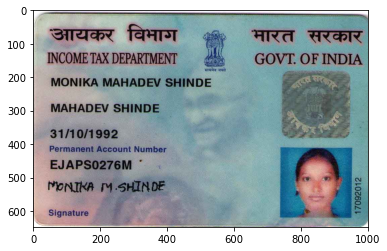

In [4]:
img = cv2.imread('pan2.jpg') # BGR format
disp_img(img)

# Text extraction

In [5]:
data = pytesseract.image_to_data(img, output_type='dict')

print(data.keys())
print('Detected Text:', data['text'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
Detected Text: ['', '', '', '', ' ', '', '', '', 'panies', '———', '', '', '', 'INCOME', 'TAX', 'DEPARTMENT', '', '', '', ' ', '', '', '', 'aan', 'a', '', '', '', 'MONIKA', 'MAHADEV', 'SHINDE', '', '', '', 'MAHADEV', 'SHINDE', '—', '', '31/10/1992', '', '', '', 'Permanent', 'Account', 'Number', '', '', '', 'EJAPS0276M', '~', '', 'MONIKA', 'M4', 'SHINDE', '', '', '', 'Signature', '', '', '', '']


In [6]:
bag = [(id, text) for id, text in enumerate(data['text']) if r.match(text)]
display(bag)

[(38, '31/10/1992'), (48, 'EJAPS0276M')]

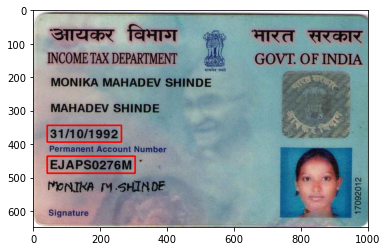

In [7]:
img_marked = img.copy()

for (id, text) in bag:
    left = data['left'][id] - margin
    top = data['top'][id] - margin
    width = data['width'][id] + 2*margin
    height = data['height'][id] + 2*margin
    cv2.rectangle(img_marked, (left, top), (left+width, top+height), (0, 0, 255), 4)

disp_img(img_marked)